# 서울시에서 일어나는 범죄와 체감 안전도
: 강남 3구 안전도가 얼마나 되는지 또한 서울시 전체의 안전도가 얼마나 되는지 확인

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import folium
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
crime_anal_police = pd.read_csv("../Data/crime_in_Seoul.csv", encoding="euc-kr")
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [3]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [4]:
crime_anal_police[crime_anal_police["관서명"] == "강서서"]

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
19,강서서,7,8,13,13,262,191,"2,096","1,260","3,207","2,718"


In [5]:
police_address = pd.read_csv("../Data/SeoulPoliceAddress.csv")
police_address.head()

,경찰관서,전화번호,FAX,주소
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16


In [6]:
station_name = []
# for name in crime_anal_police.관서명:
#   print(name[:-1])
#   station_name.append("서울" + name[:-1] + "경찰서")
station_name = list("서울" + crime_anal_police.관서명.str[:-1] + "경찰서")

In [7]:
(station_name)

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [8]:
# 경찰서 개수 확인
len(station_name)

31

In [9]:
len(police_address)

31

In [10]:
police_address.head()

,경찰관서,전화번호,FAX,주소
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16


In [11]:
import urllib.request

client_id = "0em01f3o34"
client_secret = "11BzW5zpAksJApbs6vRI4JNGhiSDC3MMwkf2J65b"

In [12]:
police_address[["lat","lng"]] = 0.0
police_address.head()

,경찰관서,전화번호,FAX,주소,lat,lng
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,0.0,0.0
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,0.0,0.0
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,0.0,0.0
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,0.0,0.0
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,0.0,0.0


In [13]:
ext = []
for i in range(len(police_address)):
  print(police_address.loc[i,"주소"])
  encText = urllib.parse.quote(police_address.loc[i,"주소"])
  url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # JSON
  request = urllib.request.Request(url)
  request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
  request.add_header("X-NCP-APIGW-API-KEY",client_secret)

  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if rescode == 200:
    response_body = response.read()
    enText = response_body.decode()
  else:
    print("Error Code:" + rescode)

  import json
  data1 = json.loads(enText)
  try:
    police_address["lng"][i] = data1['addresses'][0]['x']
    police_address["lat"][i] = data1['addresses'][0]['y']
  except:
    ext.append(i)

서울 중구 수표로 27
서울 종로구 율곡로 46
서울 중구 한강대로 410
서울 서대문구 통일로 113
서울 종로구 창경궁로 112-16
서울 용산구 원효로89길 24
서울 성북구 보문로 170
서울 동대문구 약령시로21길 29
서울 마포구 마포대로 183
서울시 영등포구 국회대로 608
서울 성동구 왕십리광장로 9
서울 동작구 노량진로 148
서울 광진구 자양로 167
서울 은평구 통일로 757
서울 강북구 오패산로 406
서울 관악구 남부순환로 1435
서울 중랑구 신내역로3길 40-10
서울 강남구 테헤란로114길 11
서울 관악구 관악로5길 33
서울 양천구 화곡로 73
서울 강동구 성내로 57
서울 성북구 종암로 135
서울 구로구 가마산로 235
서울 서초구 반포대로 179
서울 양천구 목동동로 99
서울 송파구 중대로 221
서울 노원구 노원로 283
서울 서초구 동작대로 204
서울 은평구 연서로 365
서울 도봉구 노해로 403
서울 강남구 개포로 617


In [14]:
police_address.head()

,경찰관서,전화번호,FAX,주소,lat,lng
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,37.563514,126.989614
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,37.575532,126.984929
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,37.554819,126.973563
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,37.564902,126.966785
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,37.571876,126.998932


In [15]:
map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=11
)

for name, lat, lng in zip(police_address.경찰관서, police_address.lat, police_address.lng):
  folium.Marker([lat, lng], popup=f"<pre>{name}</pre>").add_to(map)
  folium.CircleMarker(
  [lat, lng],
  radius = 20, # 원의 반지름
  # color = "skyblue",
  # fill = True,
  fill_color = "skyblue",
  fill_opacity = 0.7,
  popup=name
  ).add_to(map)
map

In [16]:
police_address.to_csv("../Data/SeoulPoliceAddress_latlng.csv", index=False)

In [17]:
# 2개의 File에 경찰관서 동일한 이름인지 확인
# 글자와 순서가 동일하다
len(station_name == police_address["경찰관서"])

31

In [18]:
# 경찰서의 주소 중 구 이름만 추출하기
crime_anal_police.관서명 = station_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,서울중부경찰서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,서울종로경찰서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,서울남대문경찰서,1,0,6,4,65,46,"1,153",382,869,794
3,서울서대문경찰서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,서울혜화경찰서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [19]:
gu_list = []
for i in range(len(crime_anal_police)):
  gu_list.append(police_address.주소[i].split()[1])
crime_anal_police["구별"] = gu_list
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,서울중부경찰서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,서울종로경찰서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,서울남대문경찰서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서울서대문경찰서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,서울혜화경찰서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [20]:
# 주소 중 2번째 단어의 끝에 "구" 이름만 출력하기
gu_name = []

for name in police_address.주소:
  if name.split()[1][-1] == "구":
    gu_name.append(name.split()[1])
gu_name

['중구',
 '종로구',
 '중구',
 '서대문구',
 '종로구',
 '용산구',
 '성북구',
 '동대문구',
 '마포구',
 '영등포구',
 '성동구',
 '동작구',
 '광진구',
 '은평구',
 '강북구',
 '관악구',
 '중랑구',
 '강남구',
 '관악구',
 '양천구',
 '강동구',
 '성북구',
 '구로구',
 '서초구',
 '양천구',
 '송파구',
 '노원구',
 '서초구',
 '은평구',
 '도봉구',
 '강남구']

In [21]:
len(gu_name)

31

In [22]:
# 리스트의 중복값 제거하고 볼때
len(set(gu_name))

23

In [23]:
# 관서명과 구별 이름 확인
crime_anal_police.loc[:, ["관서명", "구별"]]

,관서명,구별
0,서울중부경찰서,중구
1,서울종로경찰서,종로구
2,서울남대문경찰서,중구
3,서울서대문경찰서,서대문구
4,서울혜화경찰서,종로구
5,서울용산경찰서,용산구
6,서울성북경찰서,성북구
7,서울동대문경찰서,동대문구
8,서울마포경찰서,마포구
9,서울영등포경찰서,영등포구


In [24]:
# DataSet을 보면 금천서가 관악구로 편성되어 있는데 현재는 금천서는 금천구로 편성되어 있음
crime_anal_police.loc[crime_anal_police["관서명"] == "서울금천경찰서", "구별"]= "금천구"
crime_anal_police[crime_anal_police["관서명"] == "서울금천경찰서"]

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,서울금천경찰서,3,4,6,6,151,122,"1,567",888,"2,054","1,776",금천구


In [25]:
# DataSet을 보면 강서서가 양천구로 편성되어 있는데 현재는 강서서는 강서구로 편성되어 있음
crime_anal_police.loc[crime_anal_police["관서명"] == "서울강서경찰서", "구별"]= "강서구"
crime_anal_police[crime_anal_police["관서명"] == "서울강서경찰서"]

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
19,서울강서경찰서,7,8,13,13,262,191,"2,096","1,260","3,207","2,718",강서구


In [26]:
# 확인
len(crime_anal_police.구별.unique())

25

In [27]:
# csv 저장
crime_anal_police.to_csv("../Data/Seoul_crime_include_gu_name.csv", index=False)

In [28]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,서울중부경찰서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,서울종로경찰서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,서울남대문경찰서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서울서대문경찰서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,서울혜화경찰서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


> 관서명으로 데이터를 정리하는 것이 아니고 구별로 데이터를 정리해야 한다.

In [29]:
len(crime_anal_police)

31

In [30]:
crime_anal_police["절도 발생"] = crime_anal_police["절도 발생"].str.replace(",", "").astype(int)
crime_anal_police["절도 검거"] = crime_anal_police["절도 검거"].str.replace(",", "").astype(int)
crime_anal_police["폭력 발생"] = crime_anal_police["폭력 발생"].str.replace(",", "").astype(int)
crime_anal_police["폭력 검거"] = crime_anal_police["폭력 검거"].str.replace(",", "").astype(int)

In [31]:
# 구별로 데이터를 정리한다
crime_anal = pd.pivot_table(data=crime_anal_police, index="구별", aggfunc=sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


In [32]:
crime_anal["강간검거율"] = 100 * crime_anal["강간 검거"] / crime_anal["강간 발생"]
crime_anal["강도검거율"] = 100 * crime_anal["강도 검거"] / crime_anal["강도 발생"]
crime_anal["살인검거율"] = 100 * crime_anal["살인 검거"] / crime_anal["살인 발생"]
crime_anal["절도검거율"] = 100 * crime_anal["절도 검거"] / crime_anal["절도 발생"]
crime_anal["폭력검거율"] = 100 * crime_anal["폭력 검거"] / crime_anal["폭력 발생"]
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [33]:
# 검거 건수는 삭제
del crime_anal["강간 검거"]
del crime_anal["강도 검거"]
del crime_anal["살인 검거"]
del crime_anal["절도 검거"]
del crime_anal["폭력 검거"]

crime_anal

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619
구로구,281,15,8,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,151,6,3,1567,2054,80.794702,100.000000,133.333333,56.668794,86.465433
노원구,197,7,10,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665


> 전년도 발생한 사건의 검거 건수도 포함되어서 검거율이 100이 넘는 곳이 발생한다

In [34]:
# 검거율이 100이 넘는 경우에는 100으로 변경한다
# crime_anal.loc[crime_anal.강간검거율 >= 100, "강간검거율"] = 100
# crime_anal.loc[crime_anal.강도검거율 >= 100, "강도검거율"] = 100
# crime_anal.loc[crime_anal.살인검거율 >= 100, "살인검거율"] = 100
# crime_anal.loc[crime_anal.절도검거율 >= 100, "절도검거율"] = 100
# crime_anal.loc[crime_anal.폭력검거율 >= 100, "폭력검거율"] = 100

In [35]:
for i in list(crime_anal.columns)[5:]:
  crime_anal.loc[crime_anal[i] >= 100, i] = 100

In [ ]:
# iloc 이용
# crime_anal[crime_anal.iloc[:,5:] > 100] = 100

In [38]:
# Column 이름 변경하기
crime_anal.rename(columns={"강간 발생": "강간", "강도 발생":"강도","살인 발생":"살인", "절도 발생":"절도", "폭력 발생":"폭력"}, inplace=True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


---
# 데이터의 정규화(Normalization)
- 강도와 살인은 2자리수이나 절도와 폭력은 4자리이다
- 각각의 범죄 발생 건수를 비슷한 범위에 놓고 비교하는 것이 편리하다
- 각 항목의 값을 최대 1로 계산하여 그 비중 자체로 분석하는 것이 좋다.

In [39]:
# 머신러닝 모듈 사용하기
# sklearn 의 preprocessing 기능을 사용하면 최대값과 최소값을 비교하면서 정규화가 진행
from sklearn import preprocessing

In [41]:
# 정규화를 진행할 컬럼 설정
col = ["강간", "강도", "살인", "절도", "폭력"]

In [50]:
crime_anal[col].max()

강간     449
강도      22
살인      14
절도    3850
폭력    4284
dtype: int64

In [43]:
# 정규화를 진행할 컬럼의 데이터 설정
x = crime_anal[col].values
x

array([[ 449,   21,   13, 3850, 4284],
       [ 156,    6,    4, 2366, 2712],
       [ 153,   14,    7, 1434, 2649],
       [ 262,   13,    7, 2096, 3207],
       [ 320,   12,    9, 2706, 3298],
       [ 240,   14,    4, 3026, 2625],
       [ 281,   15,    8, 2335, 3007],
       [ 151,    6,    3, 1567, 2054],
       [ 197,    7,   10, 2193, 2723],
       [ 102,    9,    3, 1063, 1487],
       [ 173,   13,    5, 1981, 2548],
       [ 285,    9,    5, 1865, 1910],
       [ 294,   14,    8, 2555, 2983],
       [ 154,    5,    2, 1812, 2056],
       [ 393,    9,    8, 2635, 2399],
       [ 126,    9,    4, 1607, 1612],
       [ 150,    5,    5, 1785, 2209],
       [ 220,   13,   11, 3239, 3295],
       [ 120,    6,    3, 1890, 2509],
       [ 295,   22,   14, 2964, 3572],
       [ 194,   14,    5, 1557, 2050],
       [ 166,    9,    3, 1914, 2653],
       [ 211,   11,    6, 2184, 2293],
       [ 170,    9,    3, 2548, 2224],
       [ 187,   11,   13, 2135, 2847]])

In [44]:
# 최대값과 최소값의 값 가져오기
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler

MinMaxScaler()

In [45]:
# 정규화 시킬 최종 값은 비율로 계산되기 때문에 float 설정
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

array([[1.        , 0.94117647, 0.91666667, 1.        , 1.        ],
       [0.1556196 , 0.05882353, 0.16666667, 0.46752781, 0.43796925],
       [0.14697406, 0.52941176, 0.41666667, 0.13311805, 0.41544512],
       [0.4610951 , 0.47058824, 0.41666667, 0.37064944, 0.61494458],
       [0.62824207, 0.41176471, 0.58333333, 0.58952278, 0.64747944],
       [0.39769452, 0.52941176, 0.16666667, 0.70434159, 0.4068645 ],
       [0.51585014, 0.58823529, 0.5       , 0.45640474, 0.5434394 ],
       [0.14121037, 0.05882353, 0.08333333, 0.18083961, 0.2027172 ],
       [0.27377522, 0.11764706, 0.66666667, 0.40545389, 0.44190204],
       [0.        , 0.23529412, 0.08333333, 0.        , 0.        ],
       [0.20461095, 0.47058824, 0.25      , 0.32938644, 0.379335  ],
       [0.52737752, 0.23529412, 0.25      , 0.28776462, 0.15123346],
       [0.55331412, 0.52941176, 0.5       , 0.53534266, 0.53485878],
       [0.14985591, 0.        , 0.        , 0.26874776, 0.20343225],
       [0.83861671, 0.23529412, 0.

In [46]:
# 정규화된 범죄 건수가 있는 새로운 데이터 프레임 생성
crime_anal_norm = pd.DataFrame(x_scaled, columns=col, index=crime_anal.index)
crime_anal_norm

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479
광진구,0.397695,0.529412,0.166667,0.704342,0.406864
구로구,0.515850,0.588235,0.500000,0.456405,0.543439
금천구,0.141210,0.058824,0.083333,0.180840,0.202717
노원구,0.273775,0.117647,0.666667,0.405454,0.441902


In [48]:
col2 = ["강간검거율", "강도검거율", "살인검거율","절도검거율","폭력검거율"]
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


---
### CCTV 데이터와 합치기
: 구별 CCTV수와 인구수를 가져와서 범죄율과 얼마나 상관성이 있는지 확인

In [52]:
result_CCTV = pd.read_csv("../Data/CCTV_Result.csv", index_col="구별")
result_CCTV.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328
구로구,3227,72.106667,438308,405837,32471,67432,7.408261,15.384615
성북구,3003,78.008299,454532,442494,12038,72172,2.648438,15.878310
은평구,2962,43.091787,482509,478019,4490,82245,0.930553,17.045278


In [54]:
crime_anal_norm[["인구수", "CCTV"]]  = result_CCTV[["인구수","소계"]]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985


In [60]:
# 정규화된 범죄 발생 건수를 합하여 범죄 컬럼 생성

crime_anal_norm["범죄"] = crime_anal_norm.iloc[:,:5].apply(sum, axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342


In [84]:
# 검거율도 통합하여 컬럼 생성
crime_anal_norm["검거"] = crime_anal_norm.iloc[:,5:10].apply(sum, axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,0.971569,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,0.257321,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,0.328323,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,0.466789,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,0.572068,368.622261


---
# Seaborn을 활용한 시각화

In [64]:
import seaborn as sns

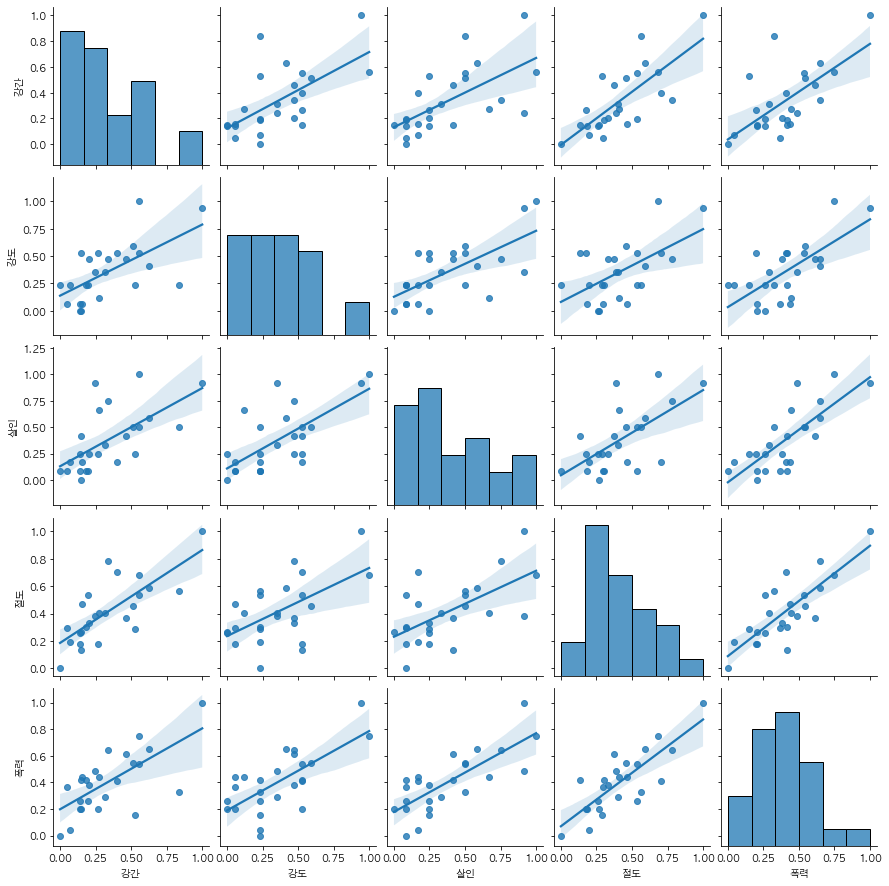

In [66]:
# 강간, 강도, 살인, 절도, 폭력 건수에 대한 상관관계 시각화

sns.pairplot(
  crime_anal_norm,
  vars=["강간", "강도", '살인', '절도', '폭력'],
  kind="reg"
)
plt.show()

> 5대 범죄 모두 양의 상관관계    
> 에를 들어 강도의 건수가 많아지면 폭력과 살인의 발생건수도 많아진다

### CCTV와 살인, 강도에 대한 그래프

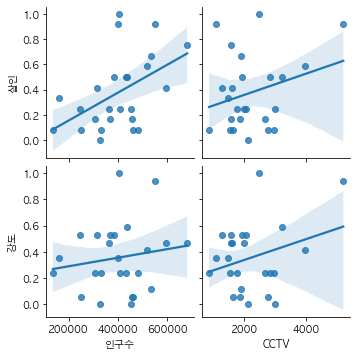

In [68]:
sns.pairplot(
  crime_anal_norm,
  x_vars=["인구수", "CCTV"],
  y_vars=["살인", "강도"],
  kind="reg"
)
plt.show()

> 인구수가 증가하면 강도와 살인 발생수도 증가한다    
> 특히, 강도 보다는 살인 발생수가 훨씬 많이 증가한다   
> CCTV와 살인은 상관관계가 있으나 강도에 비해 낮게 보인다    
> 따라서 CCTV가 없을때 살인 사건 발생수가 증가한다

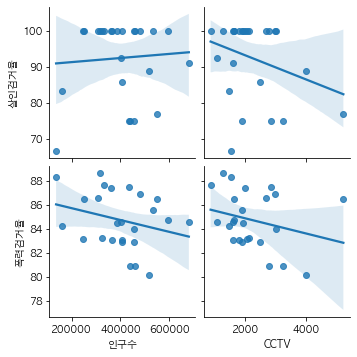

In [69]:
### 인구수, CCTV와 살인검거율, 폭력 검거율을 회귀선으로 확인 후 Comment
sns.pairplot(
  crime_anal_norm,
  x_vars=["인구수", "CCTV"],
  y_vars=["살인검거율", "폭력검거율"],
  kind="reg"
)
plt.show()

> 살인검거율은 인구수와 거의 관계가 없으며 폭력검거율과 인구수는 약한 음의 상관관계를 가진다   
> CCTV와 살인 검거율은 높은 음의 상관관계를 가지며, CCTV와 폭력 검거율은 약한 음의 상관관계를 가진다   
> 따라서 살인 검거율이 높은 지역은 CCTV 개수가 적으며, 폭력 검거율이 높은 지역은 인구수와 CCTV 개수가 작다

> 분포를 잘 확인할 것!!    
> 가정에 대해서도 잘 생각해볼 것(CCTV가 과속카메라가 아닌지?)!!

---
### heatmap을 이용한 전체 검거율 확인

In [85]:
# 검거 최대값 가져오기
tmp_max = crime_anal_norm["검거"].max()
# 검거의 최대값을 100으로 설정하고 검거율 계산하기
crime_anal_norm["검거"] = 100 * crime_anal_norm["검거"] / tmp_max

# 검거율을 기준으로 정렬하기
crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거",ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,333495,858,0.063725,100.000000
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,251370,1634,0.133385,97.997139
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,595703,1617,0.466789,96.572809
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,365990,1581,0.440996,96.375820
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,362793,2003,0.326784,95.444250


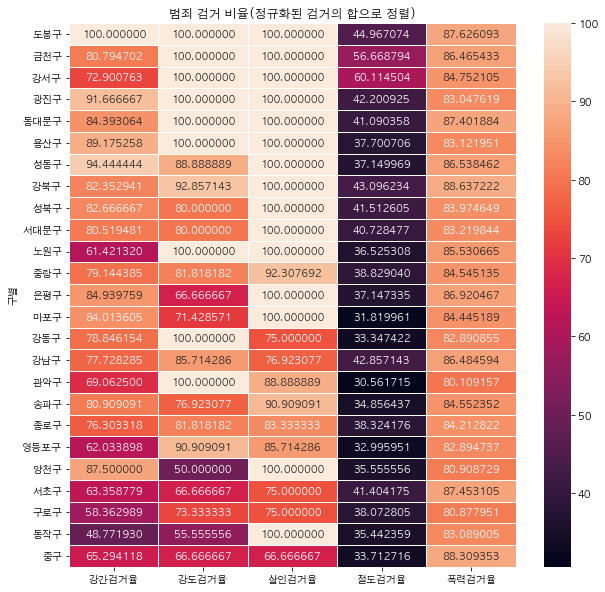

In [88]:
target_col = ["강간검거율","강도검거율","살인검거율","절도검거율","폭력검거율"]
plt.figure(figsize=(10,10))
sns.heatmap(
  crime_anal_norm_sort[target_col],
  annot=True,
  fmt = "f", # 안쓰면 지수 형태로 나온다
  linewidths=0.5,
)
plt.title("범죄 검거 비율(정규화된 검거의 합으로 정렬)")
plt.show()

> 절도검거율이 다른 검거율에 비해 매우 저조하다   
> 검거율이 우수한 지역은 도봉구, 광진구, 성동구, 용산구

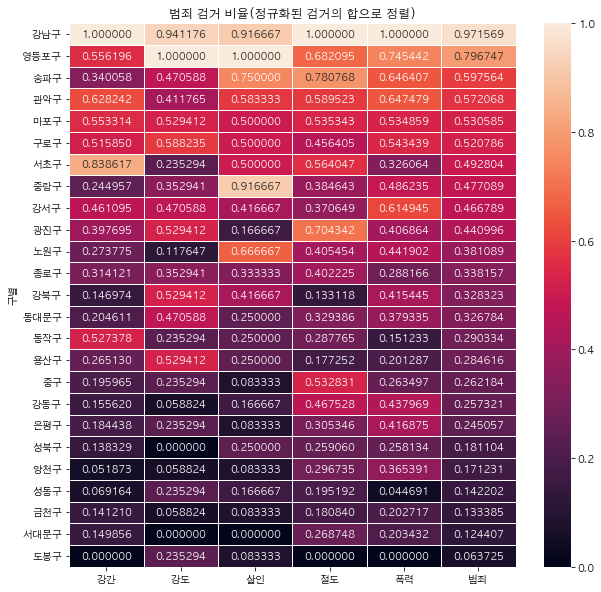

In [77]:
# 검거 최대값 가져오기
tmp_max = crime_anal_norm["범죄"].max()
# 검거의 최대값을 100으로 설정하고 검거율 계산하기
crime_anal_norm["범죄"] = crime_anal_norm["범죄"] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by="범죄",ascending=False)
### heatmap을 이용한 범죄 발생율 확인
target_col = ["강간","강도","살인","절도","폭력","범죄"]
plt.figure(figsize=(10,10))
sns.heatmap(
  crime_anal_norm_sort[target_col],
  annot=True,
  fmt = "f", # 안쓰면 지수 형태로 나온다
  linewidths=0.5,
)
plt.title("범죄 검거 비율(정규화된 검거의 합으로 정렬)")
plt.show()

In [91]:
crime_anal_norm.to_csv("../Data/seoul_crime_norm.csv")

# 지도 출력

In [89]:
import json 
import folium

In [90]:
geo_path = "../Data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [92]:
# 살인 건수를 서울시 지도에 출력
map = folium.Map(
  location=[37.5502, 126.982],
  zoom_start=10.5,
  tiles="Stamen Toner"
)

folium.Choropleth(
  geo_data=geo_str,
  data=crime_anal_norm,
  columns=[crime_anal_norm.index, "살인"],
  fill_color="PuRd",
  key_on="feature.id"
).add_to(map)


map

In [94]:
# 인구대비 범죄율 지도 출력 : 범죄 / 인구수 * 100000
crime_anal_norm["인구대비범죄율"] = 100000 * crime_anal_norm["범죄"] / crime_anal_norm["인구수"]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거,인구대비범죄율
구별,,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,0.971569,85.463066,0.176682
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,0.257321,85.550226,0.056301
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,0.328323,94.070728,0.103654
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,0.466789,96.572809,0.078359
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,0.572068,85.212224,0.110724


In [95]:
# 살인 건수를 서울시 지도에 출력
map = folium.Map(
  location=[37.5502, 126.982],
  zoom_start=10.5,
  tiles="Stamen Toner"
)

folium.Choropleth(
  geo_data=geo_str,
  data=crime_anal_norm,
  columns=[crime_anal_norm.index, "인구대비범죄율"],
  fill_color="PuRd",
  key_on="feature.id"
).add_to(map)


map